In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acute-nephritis/diagnosis.csv


In [2]:
import os
print(os.listdir("../input"))

['acute-nephritis']


In [3]:
import numpy as np
import pandas as pd


name = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet ', 'decision: Inflammation of urinary bladder',
       'decision: Nephritis of renal pelvis origin']


df = pd.read_csv('../input/acute-nephritis/diagnosis.csv', names = name, skiprows=[0])
df.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [4]:
df.tail()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes
119,41.5,no,yes,yes,no,yes,no,yes


In [5]:
df.shape

(120, 8)

In [6]:
df.describe()

,Temperature of patient
count,120.000000
mean,38.724167
std,1.819132
min,35.500000
25%,37.100000
50%,37.950000
75%,40.600000
max,41.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Temperature of patient                                 120 non-null    float64
 1   Occurrence of nausea                                   120 non-null    object 
 2   Lumbar pain                                            120 non-null    object 
 3   Urine pushing                                          120 non-null    object 
 4   Micturition pains                                      120 non-null    object 
 5   Burning of urethra, itch, swelling of urethra outlet   120 non-null    object 
 6   decision: Inflammation of urinary bladder              120 non-null    object 
 7   decision: Nephritis of renal pelvis origin             120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [8]:
df.isnull().sum()

Temperature of patient                                   0
Occurrence of nausea                                     0
Lumbar pain                                              0
Urine pushing                                            0
Micturition pains                                        0
Burning of urethra, itch, swelling of urethra outlet     0
decision: Inflammation of urinary bladder                0
decision: Nephritis of renal pelvis origin               0
dtype: int64

In [9]:
df['decision: Inflammation of urinary bladder'].value_counts()

no     61
yes    59
Name: decision: Inflammation of urinary bladder, dtype: int64

In [10]:
df['decision: Nephritis of renal pelvis origin'].value_counts()

no     70
yes    50
Name: decision: Nephritis of renal pelvis origin, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='decision: Inflammation of urinary bladder', ylabel='count'>

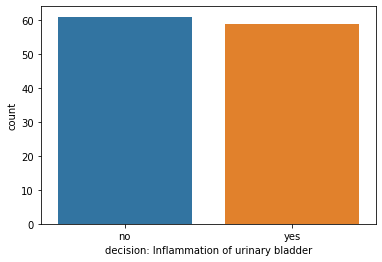

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.countplot(df['decision: Inflammation of urinary bladder'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='decision: Nephritis of renal pelvis origin', ylabel='count'>

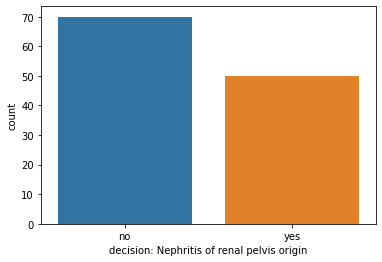

In [12]:
sns.countplot(df['decision: Nephritis of renal pelvis origin'])

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.columns[0:] :
    df[i] = le.fit_transform(df[i])

In [14]:
df.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,0,0,1,0,0,0,0,0
1,1,0,0,1,1,1,1,0
2,1,0,1,0,0,0,0,0
3,2,0,0,1,1,1,1,0
4,2,0,1,0,0,0,0,0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='decision: Inflammation of urinary bladder', ylabel='Density'>

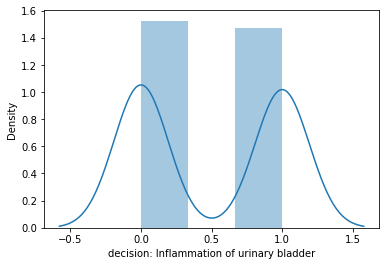

In [15]:
sns.distplot(df['decision: Inflammation of urinary bladder'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='decision: Nephritis of renal pelvis origin', ylabel='Density'>

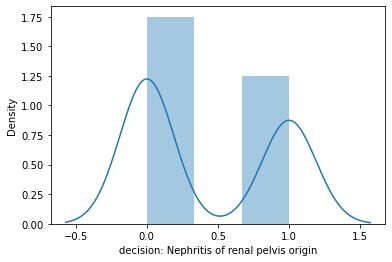

In [16]:
sns.distplot(df['decision: Nephritis of renal pelvis origin'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

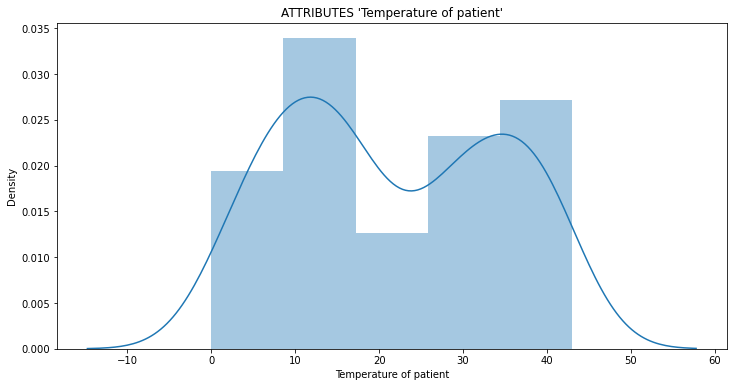

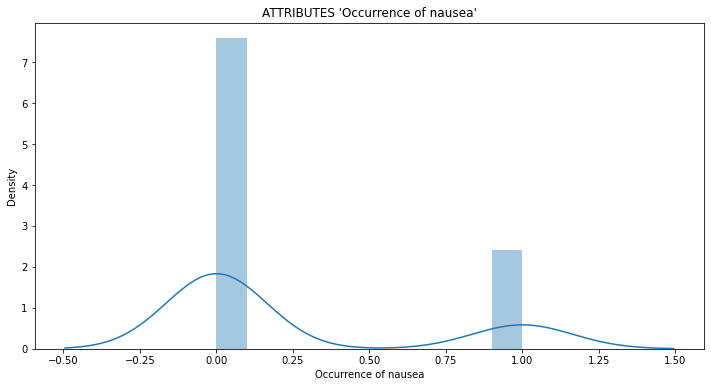

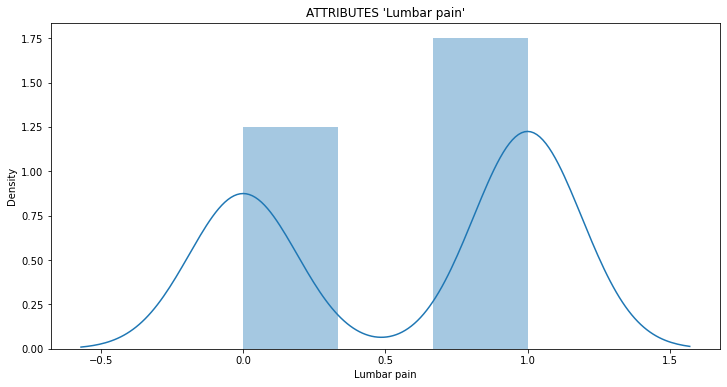

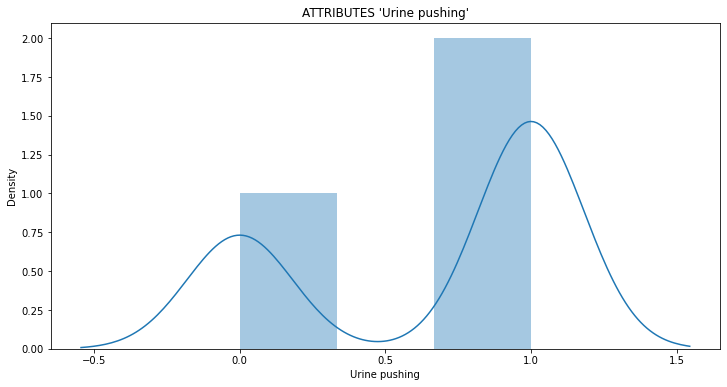

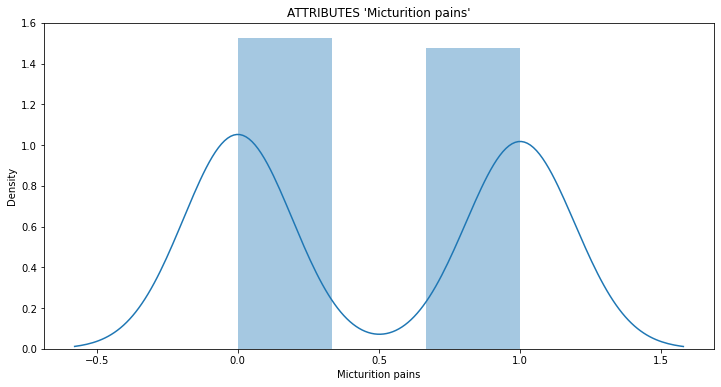

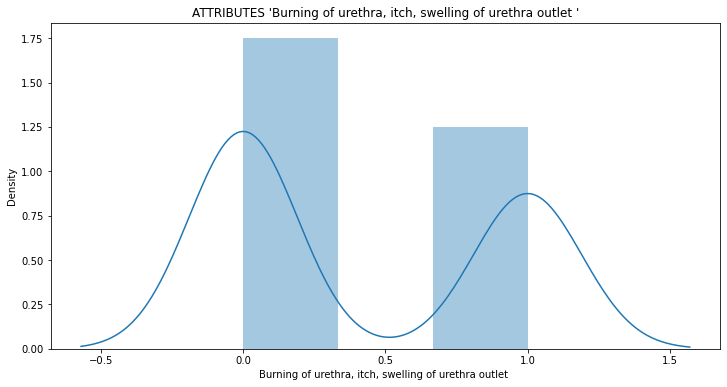

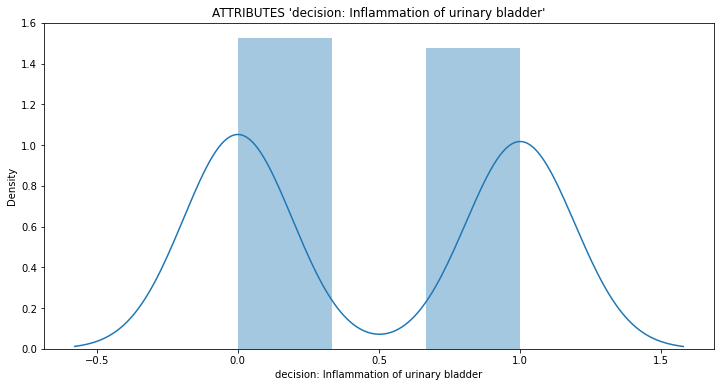

In [17]:
for i in df.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.distplot(df[i])

<AxesSubplot:>

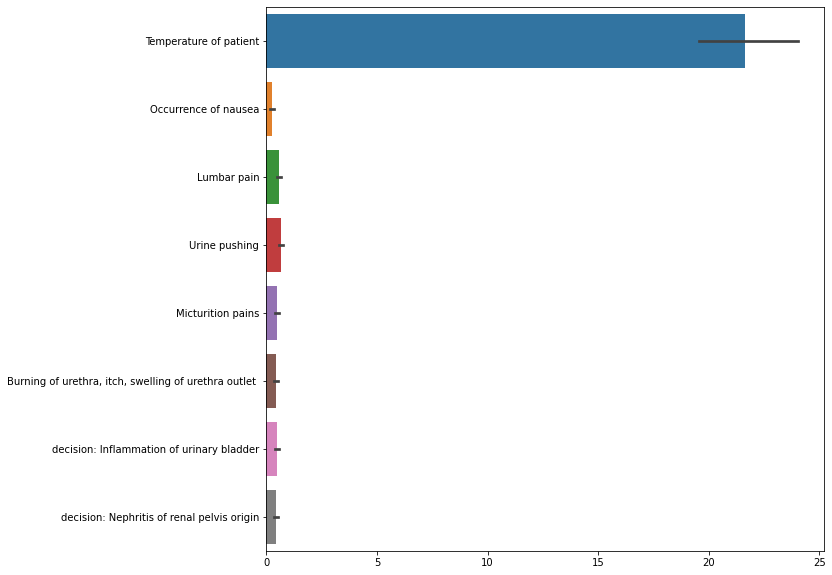

In [18]:
plt.figure(figsize=(10, 10))
sns.barplot(data = df, orient='h')

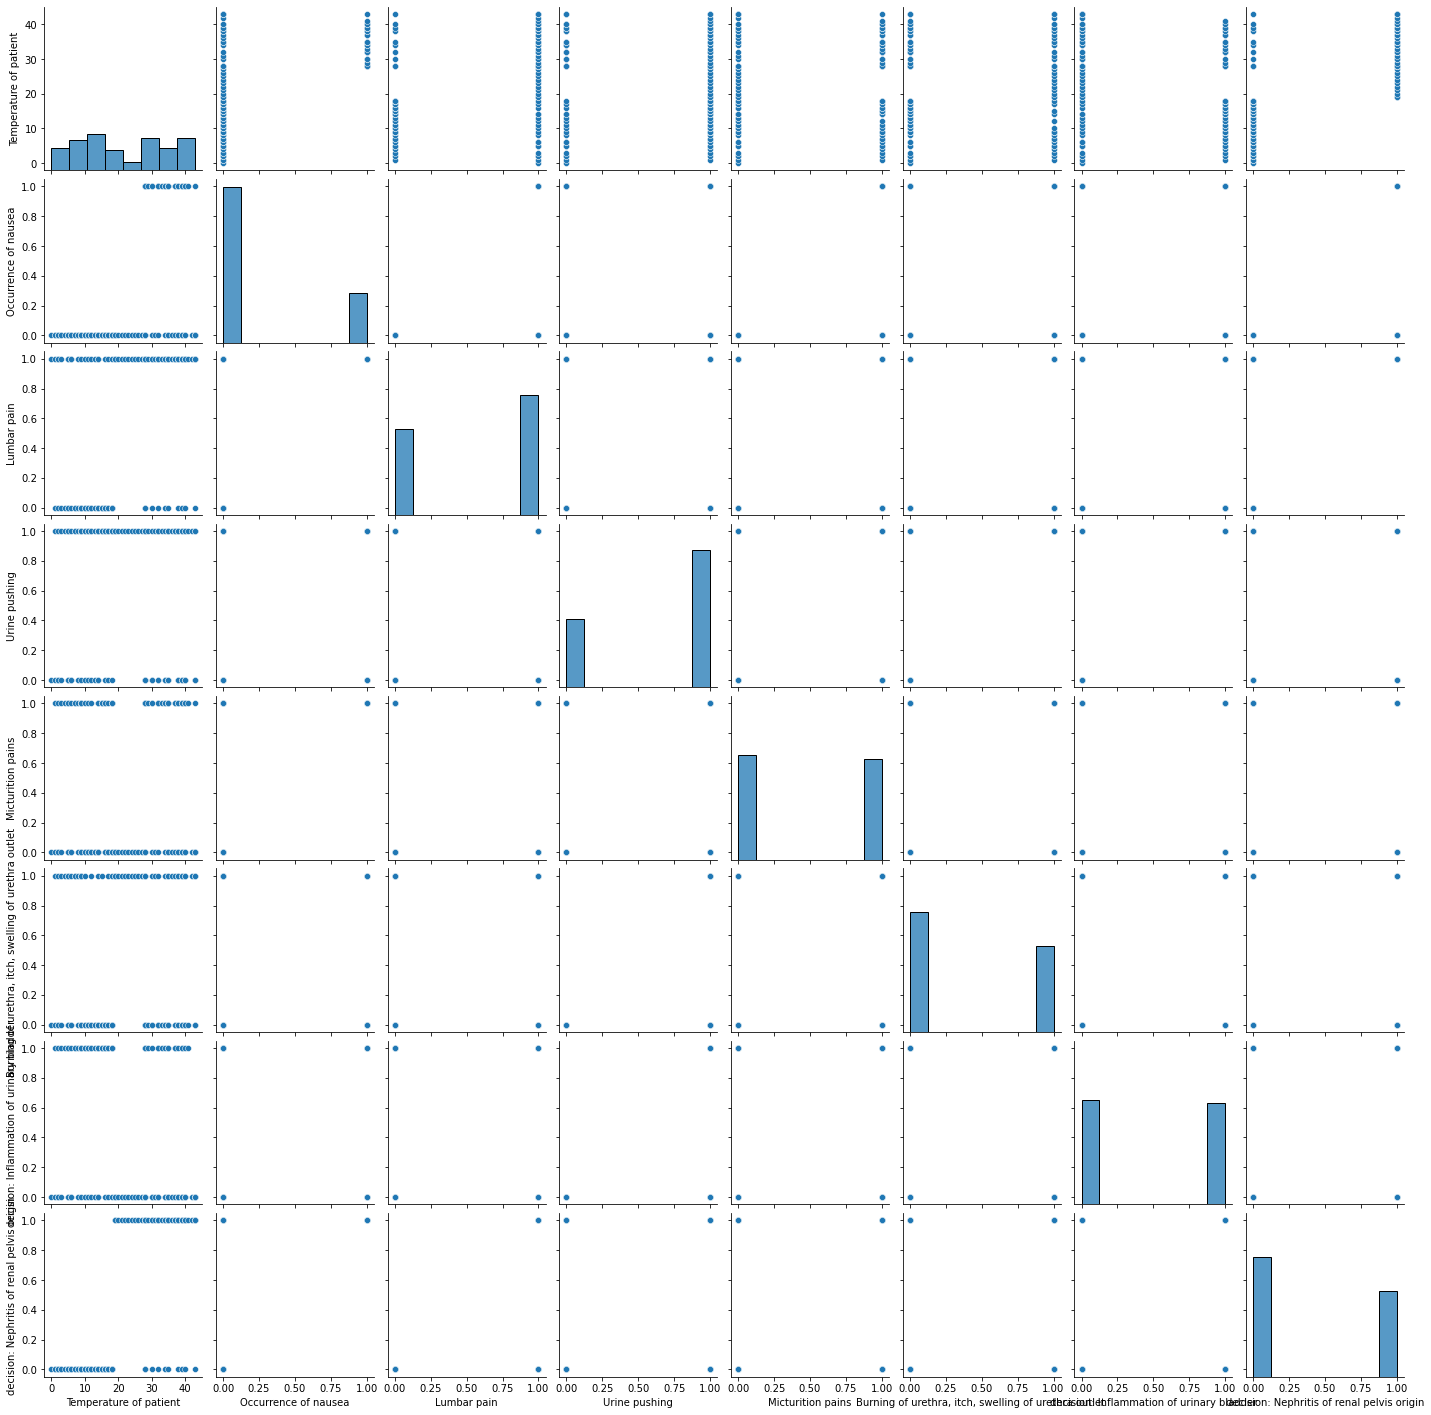

In [19]:
sns.pairplot(data=df)

<AxesSubplot:>

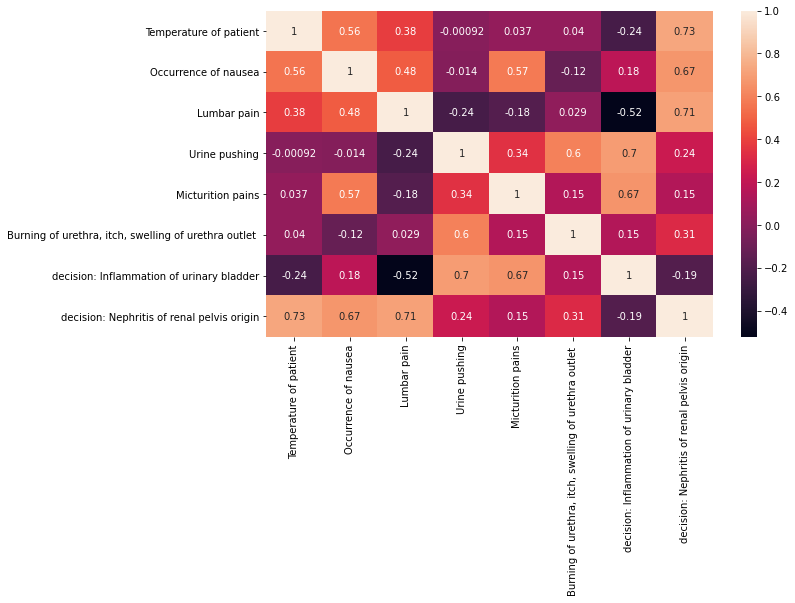

In [20]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [21]:
M = df
M.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,0,0,1,0,0,0,0,0
1,1,0,0,1,1,1,1,0
2,1,0,1,0,0,0,0,0
3,2,0,0,1,1,1,1,0
4,2,0,1,0,0,0,0,0


In [22]:
X = M.drop(['decision: Inflammation of urinary bladder', 'decision: Nephritis of renal pelvis origin'],
          axis="columns")
X.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet"
0,0,0,1,0,0,0
1,1,0,0,1,1,1
2,1,0,1,0,0,0
3,2,0,0,1,1,1
4,2,0,1,0,0,0


In [23]:
y = M['decision: Inflammation of urinary bladder']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: decision: Inflammation of urinary bladder, dtype: int64

In [24]:
z = M['decision: Nephritis of renal pelvis origin']
z.head()

0    0
1    0
2    0
3    0
4    0
Name: decision: Nephritis of renal pelvis origin, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [27]:
model.score(X_test, y_test)

0.9166666666666666

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
dtc.score(X_test, y_test)

1.0

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

In [31]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, z_train)

GaussianNB()

In [32]:
clf.score(X_test, z_test)

1.0

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, z_train)

RandomForestClassifier()

In [34]:
rfc.score(X_test, z_test)

1.0